Plots: CriticalCurvesLine
=========================

This example illustrates how to customize the critical curves plotted over data.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


To plot a critical curve, we need a `Tracer` object which performs the strong lensing calculation to
produce a critical curve. By default, critical curves are only plotted on image-plane images.

In [2]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllIsothermal(
        centre=(0.0, 0.0), einstein_radius=1.6, elliptical_comps=(0.2, 0.2)
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.SphSersic(
        centre=(0.1, 0.1), intensity=0.3, effective_radius=1.0, sersic_index=2.5
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

We also need the `Grid2D` that we can use to make plots of the `Tracer`'s properties.

In [3]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

The `Tracer` includes its critical_curves as an property, meaning we can plot them via an `Include2D` object.

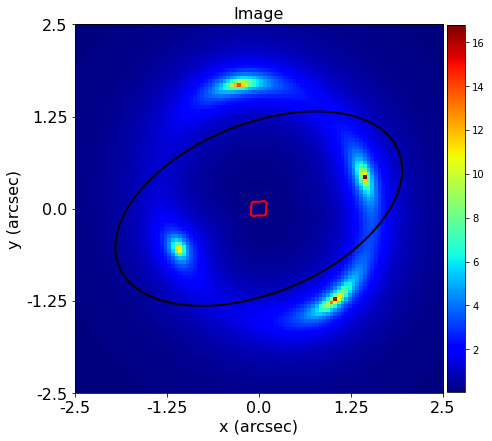

In [4]:
include_2d = aplt.Include2D(critical_curves=True, caustics=False)

tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid, include_2d=include_2d)
tracer_plotter.figures_2d(image=True)


The appearance of the critical_curves is customized using a `CriticalCurvesPlot` object.

To plot the critical_curves this object wraps the following matplotlib method:

 https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

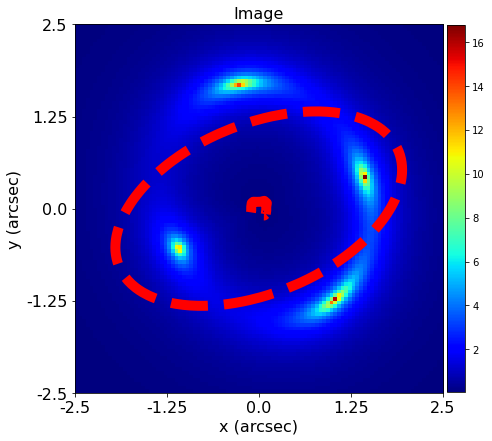

In [5]:
critical_curves_plot = aplt.CriticalCurvesPlot(linestyle="--", linewidth=10, c="r")

mat_plot_2d = aplt.MatPlot2D(critical_curves_plot=critical_curves_plot)

tracer_plotter = aplt.TracerPlotter(
    tracer=tracer, grid=grid, include_2d=include_2d, mat_plot_2d=mat_plot_2d
)
tracer_plotter.figures_2d(image=True)

By specifying two colors to the `CriticalCurvesPlot` object the radial and tangential critical_curves
will be plotted in different colors.

By default, PyAutoLens uses the same alternating colors for the critical_curves and critical_curves, so they 
appear the same color on image-plane and source-plane figures.

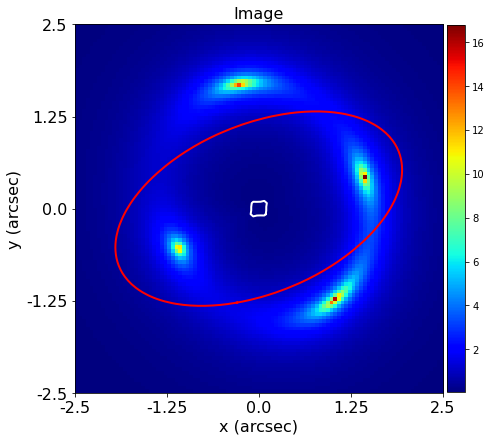

In [6]:
critical_curves_plot = aplt.CriticalCurvesPlot(c=["r", "w"])

mat_plot_2d = aplt.MatPlot2D(critical_curves_plot=critical_curves_plot)

tracer_plotter = aplt.TracerPlotter(
    tracer=tracer, grid=grid, include_2d=include_2d, mat_plot_2d=mat_plot_2d
)
tracer_plotter.figures_2d(image=True)


To plot critical_curves manually, we can pass them into a` Visuals2D` object. This is useful for plotting critical_curves on
figures where they are not an internal property, like an `Array2D`.

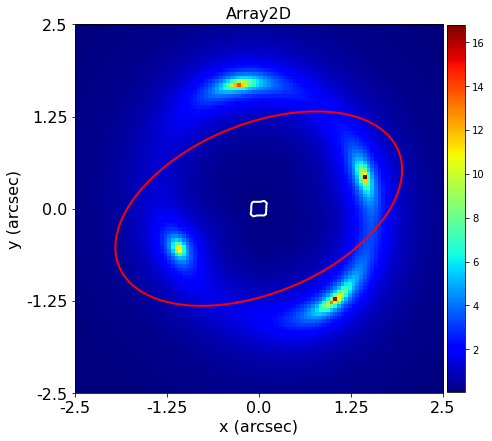

In [7]:
visuals_2d = aplt.Visuals2D(critical_curves=tracer.critical_curves_from_grid(grid=grid))
image = tracer.image_2d_from_grid(grid=grid)

array_plotter = aplt.Array2DPlotter(
    array=image, mat_plot_2d=mat_plot_2d, visuals_2d=visuals_2d
)
array_plotter.figure_2d()

Finish.